# Postgres

In [4]:
from sqlalchemy import create_engine

# Define the connection string
connection_string = 'postgresql+psycopg2://kiliansprenkamp@localhost:5432/telegram_scraper'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Example: Connecting and fetching data
import pandas as pd

# Define your SQL query
query = f"""
    SELECT chat_id, id, chat_name, messagetext, messagedatetime, embedding_user_bge_m3
    FROM messages
    WHERE embedding_user_bge_m3 IS NOT NULL 
    AND messageText IS NOT NULL
    LIMIT 200000
"""

# Execute the query and load data into a pandas DataFrame
df = pd.read_sql_query(query, engine)

# Display the DataFrame
print(df.head())

# Close the engine when done
engine.dispose()


      chat_id     id                 chat_name  \
0  1215462939  61294    https://t.me/anna_news   
1  1215462939  61295    https://t.me/anna_news   
2  1215462939  61296    https://t.me/anna_news   
3  1215462939  61297    https://t.me/anna_news   
4  1200595041  58925  https://t.me/OpenUkraine   

                                         messagetext     messagedatetime  \
0  Германия  готовится к деоккупации\n\nВ Германи... 2024-01-16 15:03:00   
1  Десантники уничтожили ДОТ противника \n\nБойцы... 2024-01-16 15:34:54   
2  Украина призывает кустарно собрать для ВСУ до ... 2024-01-16 15:59:33   
3  ⚡️Владимир Путин предложил продлить выставку «... 2024-01-16 16:17:42   
4  И не верьте вы этим лживым собакам из Верховно... 2024-01-29 18:26:56   

                               embedding_user_bge_m3  
0  [-0.0037015595007687807, -0.003712232690304517...  
1  [0.03959280624985695, 0.013972862623631954, -0...  
2  [-0.0360097773373127, -0.006706099957227707, -...  
3  [-0.033448666334152

In [8]:
import pandas as pd
df = pd.read_csv("../../similar_messages_BGE.csv")

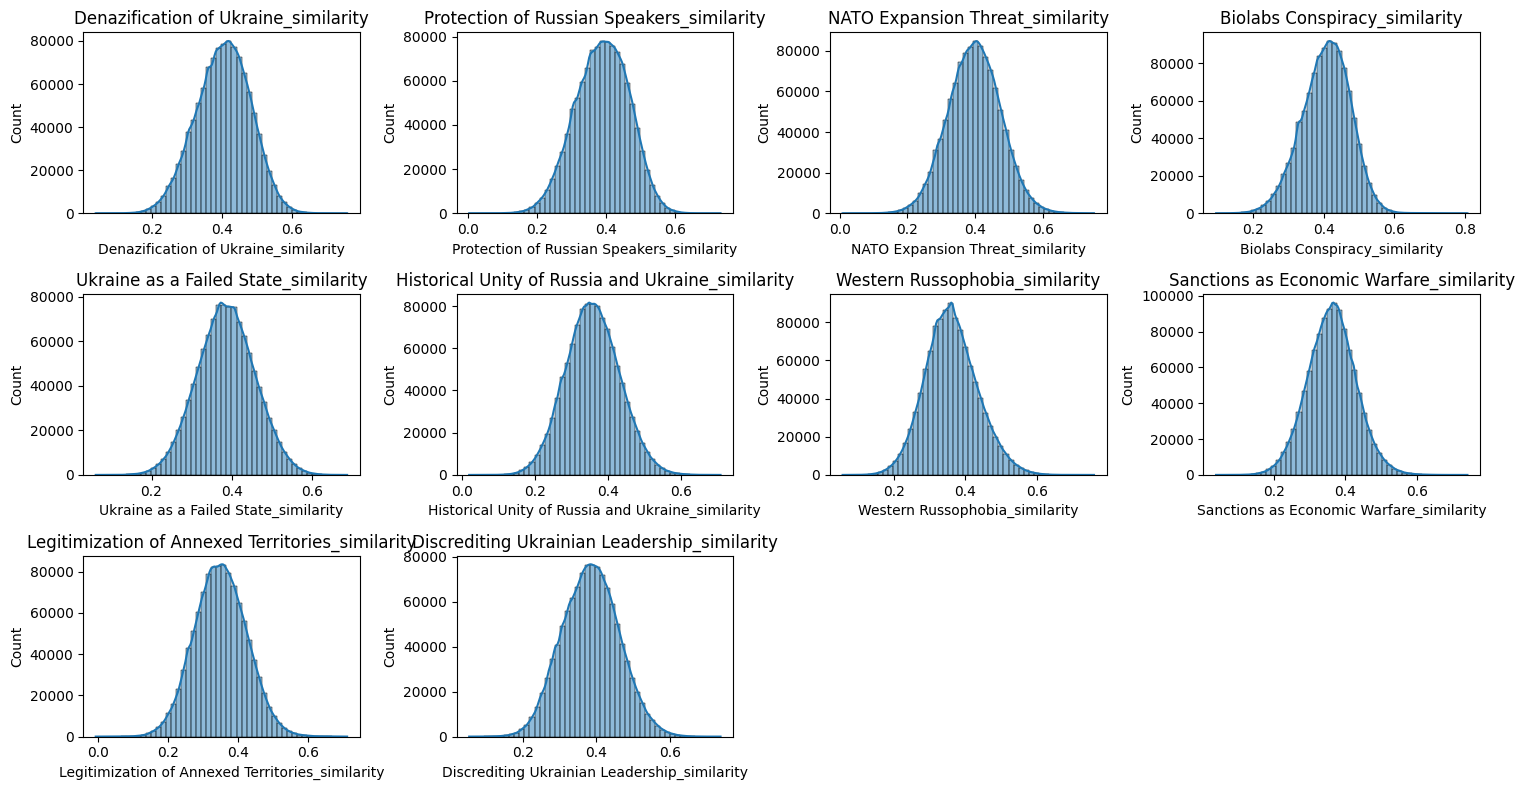

/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_44043/2278419797.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), label=col, shade=True)
/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_44043/2278419797.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), label=col, shade=True)
/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_44043/2278419797.py:22: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[col].dropna(), label=col, shade=True)
/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_44043/2278419797.py:22: FutureWarning: 

`shade` is now dep

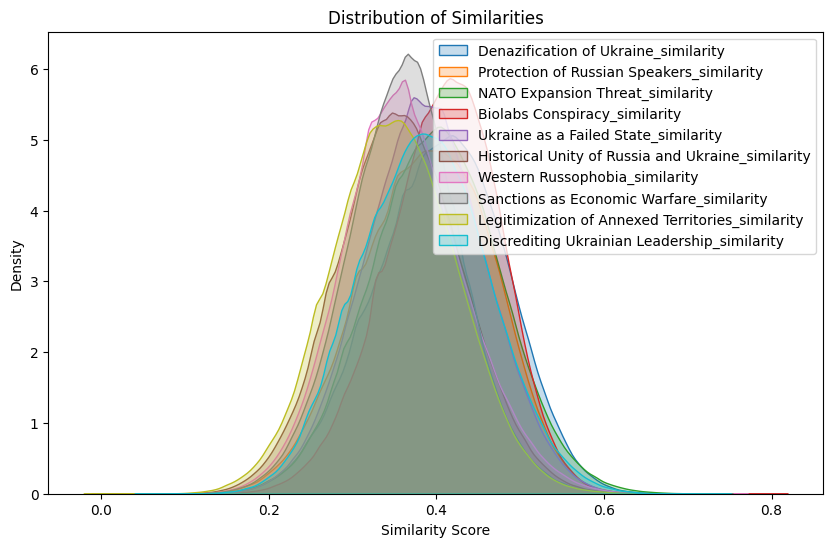

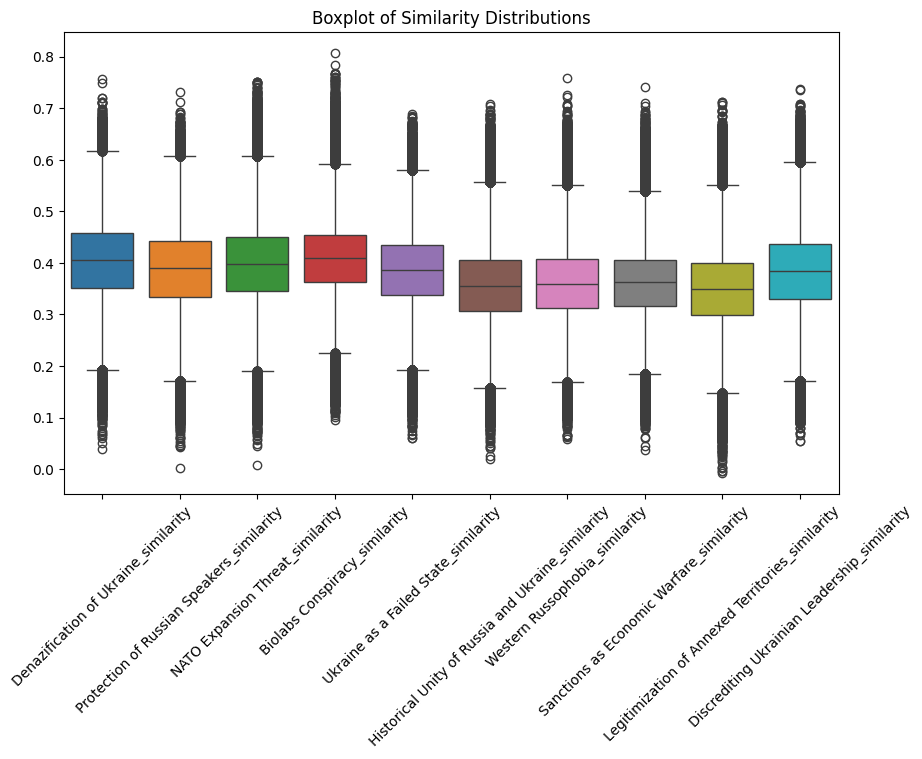

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# If the CSV delimiter is comma, just use pd.read_csv("similar_messages_BGE.csv")

# Identify similarity columns (they may all share a suffix, like '_similarity')
similarity_cols = [col for col in df.columns if col.endswith('_similarity')]

# Option 1: Plot all distributions in one figure side-by-side
plt.figure(figsize=(15, 8))
for i, col in enumerate(similarity_cols):
    plt.subplot(3, 4, i+1)  # Adjust for however many columns you have (3x4 is for 12 columns, for example)
    sns.histplot(data=df, x=col, kde=True, bins=50)
    plt.title(col)
plt.tight_layout()
plt.show()

# Option 2: Plot overlapping KDE plots in a single figure (if it makes sense)
plt.figure(figsize=(10, 6))
for col in similarity_cols:
    sns.kdeplot(df[col].dropna(), label=col, shade=True)
plt.title("Distribution of Similarities")
plt.xlabel("Similarity Score")
plt.ylabel("Density")
plt.legend()
plt.show()

# Option 3: For quick inspection, you could also plot a boxplot:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df[similarity_cols])
plt.title("Boxplot of Similarity Distributions")
plt.xticks(rotation=45)
plt.show()


In [12]:
# Identify the similarity columns if not already known
similarity_cols = [col for col in df.columns if col.endswith('_similarity')]

# Filter rows where all similarity scores are >= 0.6
df = df[(df[similarity_cols] >= 0.6).any(axis=1)]

# Now df_filtered contains only rows where every similarity column is at least 0.6
print(df)


             id                                        messagetext  \
4             4  Это мой первый пост в Telegram. Обстоятельства...   
10            6  1. В последнее время одна из самых обсуждаемых...   
74           21  С журналистами РИА Новости и RT поговорили и о...   
79           22  Россия является ядерной державой, обладателем ...   
83           23  Цель переговоров с Украиной понятна – зафиксир...   
...         ...                                                ...   
1100571  444250  👆➡️ Главное чтобы российское военно-политическ...   
1100741  444507  На днях глава ФСБ Александр Бортников публично...   
1100747  444517  Франция и союзники по НАТО могли бы ввести вой...   
1100854  444725  Соответствует ли потенциал России её амбициям,...   
1100946  444859  Бывший генсек НАТО Йенс Столтенберг внезапно з...   

            chat_id                       chat_name      messagedatetime  \
4        1572748754  https://t.me/medvedev_telegram  2022-03-17 06:59:14   
10     

In [ ]:
similarity_cols = [col for col in df.columns if col.endswith('_similarity')]

# Ensure the directory exists for output
import os
output_dir = "nsmallest25_per_narrative"
os.makedirs(output_dir, exist_ok=True)

for col in similarity_cols:
    # Sort df by this narrative's similarity in descending order and select top 25
    df_over = df[df[col]>0.6]  
    top_25 = df_over.nsmallest(25, col)
    
    # Construct a file name based on the narrative
    narrative_name = col.replace("_similarity", "")  # remove the suffix to get the narrative name
    filename = os.path.join(output_dir, f"{narrative_name}_top25.txt")
    
    # Extract the messages (and potentially other info)
    # For simplicity, we'll just write the message text and similarity score
    with open(filename, "w", encoding="utf-8") as f:
        for _, row in top_25.iterrows():
            message_text = str(row["messagetext"])
            similarity_score = row[col]
            # Write message text and similarity score
            f.write(f"""Similarity: {similarity_score:.4f}
Channel: {row["chat_name"]}
Message: {message_text}\n\n""")
    
    print(f"Saved top 25 messages for {narrative_name} to {filename}")


Saved top 25 messages for Denazification of Ukraine to nsmallest25_per_narrative/Denazification of Ukraine_top25.txt
Saved top 25 messages for Protection of Russian Speakers to nsmallest25_per_narrative/Protection of Russian Speakers_top25.txt
Saved top 25 messages for NATO Expansion Threat to nsmallest25_per_narrative/NATO Expansion Threat_top25.txt
Saved top 25 messages for Biolabs Conspiracy to nsmallest25_per_narrative/Biolabs Conspiracy_top25.txt
Saved top 25 messages for Ukraine as a Failed State to nsmallest25_per_narrative/Ukraine as a Failed State_top25.txt
Saved top 25 messages for Historical Unity of Russia and Ukraine to nsmallest25_per_narrative/Historical Unity of Russia and Ukraine_top25.txt
Saved top 25 messages for Western Russophobia to nsmallest25_per_narrative/Western Russophobia_top25.txt
Saved top 25 messages for Sanctions as Economic Warfare to nsmallest25_per_narrative/Sanctions as Economic Warfare_top25.txt
Saved top 25 messages for Legitimization of Annexed Te

In [14]:
similarity_cols = [col for col in df.columns if col.endswith('_similarity')]

# For each narrative column, count how many rows meet the condition
counts_above = {}
for col in similarity_cols:
    counts_above[col] = (df[col] >= 0.6).sum()

print(counts_above)

{'Denazification of Ukraine_similarity': np.int64(3070), 'Protection of Russian Speakers_similarity': np.int64(1124), 'NATO Expansion Threat_similarity': np.int64(5490), 'Biolabs Conspiracy_similarity': np.int64(1410), 'Ukraine as a Failed State_similarity': np.int64(1160), 'Historical Unity of Russia and Ukraine_similarity': np.int64(783), 'Western Russophobia_similarity': np.int64(1266), 'Sanctions as Economic Warfare_similarity': np.int64(701), 'Legitimization of Annexed Territories_similarity': np.int64(770), 'Discrediting Ukrainian Leadership_similarity': np.int64(2647)}


In [ ]:
import pandas as pd

# Original data
data = [
    {"description": "Denazification of Ukraine", "similarity": 0.376840, "messagetext": "Text A"},
    {"description": "Protection of Russian Speakers", "similarity": 0.440451, "messagetext": "Text A"},
    {"description": "NATO Expansion Threat", "similarity": 0.494143, "messagetext": "Text A"},
]

# Convert to DataFrame
df_test = pd.DataFrame(data)

# Pivot the DataFrame
pivot_df = df_test.pivot(index="messagetext", columns="description", values="similarity")

# Reset the index to make it more readable
pivot_df = pivot_df.reset_index()

# Display the transformed DataFrame
# 
# import ace_tools as tools; tools.display_dataframe_to_user(name="Transformed Similarity Data", dataframe=pivot_df)


In [13]:
pivot_df

description,messagetext,Denazification of Ukraine,NATO Expansion Threat,Protection of Russian Speakers
0,Text A,0.37684,0.494143,0.440451


In [ ]:
import torch 
from sentence_transformers import SentenceTransformer  # Added SentenceTransformer import

# Initialize SentenceTransformer model
EMBEDDING_MODEL_NAME = "deepvk/USER-bge-m3"
# You can set device to 'cuda' if you have a GPU, otherwise 'cpu'
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL = SentenceTransformer(EMBEDDING_MODEL_NAME, device=DEVICE)

def get_embedding(text):
    """Generate embedding for the given text using SentenceTransformer."""
    return MODEL.encode(text).tolist()

/opt/miniconda3/envs/apollo/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


In [27]:
from sqlalchemy import create_engine

# Define the connection string
connection_string = 'postgresql+psycopg2://kiliansprenkamp@localhost:5432/telegram_scraper'

# Create the SQLAlchemy engine
engine = create_engine(connection_string)

# Example: Connecting and fetching data
import pandas as pd

# Define your SQL query
query = f"""
    SELECT *
    FROM messages
    WHERE embedding_ru_core_news_lg IS NOT NULL 
    AND messageText IS NOT NULL
    LIMIT 1000
"""

# Execute the query and load data into a pandas DataFrame
df = pd.read_sql_query(query, engine)

# Display the DataFrame
print(df.head())

# Close the engine when done
engine.dispose()

import torch 
from sentence_transformers import SentenceTransformer  # Added SentenceTransformer import

# Initialize SentenceTransformer model
EMBEDDING_MODEL_NAME = "deepvk/USER-bge-m3"
# You can set device to 'cuda' if you have a GPU, otherwise 'cpu'
DEVICE = "cuda" if torch.cuda.is_available() else "cpu"
MODEL = SentenceTransformer(EMBEDDING_MODEL_NAME, device=DEVICE)

def get_embedding(text):
    """Generate embedding for the given text using SentenceTransformer."""
    return MODEL.encode(text).tolist()

from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

def compute_similarity(sample_embedding, message_embedding):
    """Compute cosine similarity between two embeddings."""
    sample_array = np.array(sample_embedding).reshape(1, -1)
    message_array = np.array(message_embedding).reshape(1, -1)
    return cosine_similarity(sample_array, message_array)[0][0]

sample_text = 'В Чехии в декларацию основных прав и свобод человека, являющуюся составной частью конституции страны, включили право защищать жизнь самого себя и других людей при помощи оружия.'
embedding_text = get_embedding(sample_text)
print(compute_similarity(df.embedding_user_bge_m3[0], embedding_text))


      chat_id      id                chat_name     peer_id  \
0  1036362176  133619  https://t.me/rt_russian  1036362176   
1  1036362176  133620  https://t.me/rt_russian  1036362176   
2  1036362176  133621  https://t.me/rt_russian  1036362176   
3  1036362176  133622  https://t.me/rt_russian  1036362176   
4  1036362176  133623  https://t.me/rt_russian  1036362176   

      messagedatetime messagedate  \
0 2022-10-23 05:51:10  2022-10-23   
1 2022-10-23 06:45:24  2022-10-23   
2 2022-10-23 06:46:57  2022-10-23   
3 2022-10-23 06:53:28  2022-10-23   
4 2022-10-23 06:53:32  2022-10-23   

                                         messagetext    out  mentioned  \
0  Бастрыкин взял под личный контроль расследован...  False      False   
1  Украинские боевики ведут обстрел Пантелеймонов...  False      False   
2  Трамп заявил, что не допустил бы кризиса на Ук...  False      False   
3  Украина нанесла три удара по гостинице в Энерг...  False      False   
4  Директора украинского «Мотор Си

In [19]:
sample_text = 'В Чехии в декларацию основных прав и свобод человека, являющуюся составной частью конституции страны, включили право защищать жизнь самого себя и других людей при помощи оружия.'
embedding_text = get_embedding(sample_text)
print(compute_similarity(df.embedding_user_bge_m3[0], embedding_text))

0.8641662166577203


In [17]:
df.columns

Index(['chat_id', 'id', 'chat_name', 'peer_id', 'messagedatetime',
       'messagedate', 'messagetext', 'out', 'mentioned', 'media_unread',
       'silent', 'post', 'from_scheduled', 'legacy', 'edit_hide', 'pinned',
       'noforwards', 'invert_media', 'offline', 'from_id',
       'from_boosts_applied', 'saved_peer_id', 'fwd_from', 'fwd_from_type',
       'via_bot_id', 'via_business_bot_id', 'reply_to', 'reply_markup',
       'entities', 'edit_date', 'post_author', 'grouped_id', 'ttl_period',
       'quick_reply_shortcut_id', 'effect', 'factcheck', 'views', 'forwards',
       'replies', 'reactions', 'embedding', 'embedding_ru_core_news_lg',
       'embedding_user_bge_m3'],
      dtype='object')

In [16]:
embedding_text

[0.02557995915412903,
 0.021977990865707397,
 -0.024793002754449844,
 -0.0027870330959558487,
 0.0004808721714653075,
 -0.057403311133384705,
 0.05338940769433975,
 0.004561894107609987,
 0.02848340943455696,
 -0.002829559613019228,
 0.0317525640130043,
 0.01569458283483982,
 -0.05239078775048256,
 -0.04487670958042145,
 -0.020289544016122818,
 0.007775263395160437,
 0.028205247595906258,
 -0.002374026458710432,
 -0.010689017362892628,
 -0.01323324628174305,
 -0.030671900138258934,
 0.007047842722386122,
 -0.027597270905971527,
 -0.009759875014424324,
 0.013947281055152416,
 0.01244597788900137,
 -0.05548994243144989,
 0.004720192402601242,
 -0.025302279740571976,
 -0.014789079315960407,
 -0.02487378567457199,
 0.01729859784245491,
 0.017834236845374107,
 -0.013017062097787857,
 -0.016031501814723015,
 -0.010051032528281212,
 -0.028781333938241005,
 -0.067927785217762,
 -0.006829019635915756,
 -0.0007158467778936028,
 0.016638625413179398,
 0.0031284792348742485,
 -0.007864837534725666

In [10]:
df.messagetext[0]

'В Чехии в декларацию основных прав и свобод человека, являющуюся составной частью конституции страны, включили право защищать жизнь самого себя и других людей при помощи оружия.\nВнести изменения в конституцию предложила группа сенаторов в качестве реакции на инициативы руководства ЕС по ужесточению оружейного законодательства в рамках Евросоюза. Сенаторы опирались на петицию, которую подписали более 100 тысяч человек.'

In [15]:
import pandas as pd
df = pd.read_csv("../../similar_messages_BGE.csv")

In [19]:
df.messagetext.values

array(['На украинской территории была сформирована сеть биологических лабораторий - более 30 объектов. Заказчиком проводимых на них работа является пентагон. В реализации проектов принимает участие аффилированная с военными ведомством компания – в первую очередь, Black and Veatch.  \nВ спецоперации на Украине Вооруженные Силы России вскрыли факты экстренной зачистки киевским режимом следов военно-биологической программы. Имеется информация об уничтожении особо опасных патогенов: возбудителей чумы, сибирской язвы, туляремии, холеры и других смертельных болезней. \nЗаявления представителя госдепартамента свидетельствуют о том, что США опасаются попадания хранящихся на указанных объектах патогенов в руки российских экспертов. В таком случае будет подтверждено нарушение Украиной и США Конвенции о запрещении биологического и токсинного оружия.  \nИнтересно, как Вашингтон прореагирует на сегодняшнее обвинение со стороны КНР о том, что пентагон развернул 336 биолабораторий в 30 странах? Почем

In [28]:
df = df[df.Similarity > 0.90]

In [5]:
df.columns

Index(['Description', 'Similarity', 'id', 'edit_date', 'grouped_id',
       'ttl_period', 'quick_reply_shortcut_id', 'views', 'forwards', 'replies',
       'reactions', 'chat_id', 'peer_id', 'messagedatetime', 'messagedate',
       'out', 'mentioned', 'media_unread', 'silent', 'post', 'from_scheduled',
       'legacy', 'edit_hide', 'pinned', 'noforwards', 'invert_media',
       'offline', 'from_id', 'from_boosts_applied', 'saved_peer_id',
       'fwd_from', 'via_bot_id', 'via_business_bot_id', 'reply_to',
       'chat_name', 'effect', 'factcheck', 'reply_markup', 'messagetext',
       'entities', 'embedding', 'fwd_from_type', 'post_author'],
      dtype='object')

In [8]:
df = df[df.Similarity > 0.9]

In [14]:
df[df.Description == "Denazification of Ukraine"].sort_values("Similarity", ascending=False).messagetext.values

array(['🇷🇺🇹🇯🏴 О «Партии исламского возрождения Таджикистана» \n\n14 сентября в Москве Верховный суд РФ рассмотрит ходатайство Генпрокуратуры о признании «Партии исламского возрождения» (ПИВТ) террористической в России.\n\n🔻 Что такое ПИВТ? \n\nДвижение зародилось еще в советскую эпоху как сеть подпольных религиозных кружков. С начала 90-х ПИВТ претендовала на лидерство в Таджикистане. Члены организации вступили с законным правительством в кровопролитную войну, чуть не разрушившую страну.\n\nВ годы конфликта в Таджикистане (1992-1997 гг.) ПИВТ входила в «Объединенную таджикскую оппозицию» и противостояла «Народному фронту» действующего президента Эмомали Рахмона.\n\nПосле подписания мира в 1997 году члены движения продолжили свою деятельность в Таджикистане в качестве зарегистрированной оппозиционной политической партии. \n\nОднако в 2015 году на основании доказательств о причастности ПИВТ к убийствам представителей власти, попыткам организовать вооруженные мятежи и госпереворот, а такж

In [15]:
from keybert import KeyBERT

# Initialize the KeyBERT model with the specified pre-trained model
model = KeyBERT('deepvk/USER-bge-m3')

# Example text
text = """
Балкенкройц на украинском танке — украинские нацисты хвастаются раскраской техники в духе нацистов предыдущих, которых русские 77 лет назад закатали в землю. Ю.Котенок
"""

# Extract keywords with n-gram range of 1 to 2
keywords = model.extract_keywords(text, keyphrase_ngram_range=(1, 2))

# Print the extracted keywords
print("Keywords:")
for keyword in keywords:
    print(keyword)


/opt/miniconda3/envs/apollo/lib/python3.12/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:13: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


Keywords:
('украинские нацисты', 0.6546)
('нацисты хвастаются', 0.6478)
('танке украинские', 0.6466)
('украинском танке', 0.6397)
('нацистов', 0.6272)


In [14]:
!pip install keybert

# Load, Sample and Add english translation of messaged

In [ ]:
import sqlite3

db_file = "../../data/sqllite/telegram.db"

# Connect to the database
conn = sqlite3.connect(db_file)

# Query to list all tables in the SQLite database
query = "SELECT name FROM sqlite_master WHERE type='table';"

# Execute the query
cursor = conn.cursor()
cursor.execute(query)
tables = cursor.fetchall()

# Print the table names
print("Tables in the database:")
for table in tables:
    print(table[0])

# Close the connection
conn.close()


Tables in the database:
channels
sqlite_sequence
content
links


In [1]:
import sqlite3
import pandas as pd

# Specify the SQLite database file
db_file = "../../data/sqllite/telegram.db"

# Connect to the database
conn = sqlite3.connect(db_file)

# Write your SQL query (example: select all rows from a table)
query = "SELECT * FROM telegram_messages;"

# Read the query results into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the connection
conn.close()

# Display the DataFrame
print(df)


Empty DataFrame
Columns: [chat, id, peer_id, messageDatetime, messageDate, messageText, out, mentioned, media_unread, silent, post, from_scheduled, legacy, edit_hide, pinned, noforwards, invert_media, offline, from_id, from_boosts_applied, saved_peer_id, fwd_from, fwd_from_type, via_bot_id, via_business_bot_id, reply_to, reply_markup, entities, edit_date, post_author, grouped_id, restriction_reason, ttl_period, quick_reply_shortcut_id, effect, factcheck, views, forwards, replies, reactions, embedding]
Index: []

[0 rows x 41 columns]


In [40]:
df.url.unique().tolist()

['https://t.me/s/tokanamd/25819',
 'https://t.me/s/tokanamd/25814',
 'https://t.me/s/tokanamd/25813',
 'https://t.me/s/tokanamd/25812',
 'https://t.me/s/tokanamd/25810',
 'https://t.me/s/tokanamd/25809',
 'https://t.me/s/tokanamd/25808',
 'https://t.me/s/tokanamd/25806',
 'https://t.me/s/tokanamd/25805',
 'https://t.me/s/tokanamd/25804',
 'https://t.me/s/tokanamd/25803',
 'https://t.me/s/tokanamd/25802',
 'https://t.me/s/tokanamd/25801',
 'https://t.me/s/tokanamd/25794',
 'https://t.me/s/tokanamd/25793',
 'https://t.me/s/tokanamd/25792',
 'https://t.me/s/tokanamd/25789',
 'https://t.me/s/tokanamd/25788',
 'https://t.me/s/tokanamd/25787',
 'https://t.me/s/tokanamd/25785',
 'https://t.me/s/tokanamd/25781',
 'https://t.me/s/tokanamd/25780',
 'https://t.me/s/tokanamd/25778',
 'https://t.me/s/tokanamd/25777',
 'https://t.me/s/tokanamd/25774',
 'https://t.me/s/tokanamd/25773',
 'https://t.me/s/tokanamd/25772',
 'https://t.me/s/tokanamd/25771',
 'https://t.me/s/tokanamd/25770',
 'https://t.me

In [ ]:
import pandas as pd
import numpy as np
import json
# from deep_translator import GoogleTranslator

SAMPLE_SIZE = 100

# def translate(x):
#     try:
#         tranlsation = GoogleTranslator(source='auto', target='en').translate(x)
#     except:
#         tranlsation = ""
#     return tranlsation

def total_interactions(x):
    reactions_total = 0
    for _, value in json.loads(x.replace("'", '"')).items():
        reactions_total += value
    return reactions_total

def weighted_popularity_score(row):
    return np.mean([row.views, row.forwards, row.reaction_nb])

def min_max_normalization(col, df):
    return (df[col]-df[col].min())/(df[col].max()-df[col].min())


df = pd.read_csv('../../data/telegram/telegram.csv')
df['reaction_nb'] = df.reactions.apply(lambda x: total_interactions(x))

df["views_norm"] = min_max_normalization("views", df)
df["forwards_norm"] = min_max_normalization("forwards", df)
df["reaction_nb_norm"] = min_max_normalization("reaction_nb", df)

df['popularity_score'] = df.apply(lambda x: weighted_popularity_score(x), axis=1)
df = df.sort_values('popularity_score', ascending=False)

sampled = df.iloc[:SAMPLE_SIZE]
# sampled['englishMessageText'] = sampled.messageText.apply(lambda x: translate(x))
# sampled.to_csv('../../data/telegram/sample_with_translations.csv', index=False)

In [30]:
import pandas as pd

df = pd.read_csv('../../data/telegram/messages_scraped.csv')

/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_64841/1080469118.py:3: DtypeWarning: Columns (24,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/telegram/messages_scraped.csv')


In [31]:
#sample 20000
df = df.sample(5000)
df.to_csv('../../data/telegram/messages_scraped_sample5000.csv', index=False)

In [26]:
import os
import argparse
from bertopic import BERTopic
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from umap import UMAP 
from hdbscan import HDBSCAN
import pandas as pd
import openai
from bertopic.representation import OpenAI
import tiktoken 
import numpy as np
from bertopic.backend import BaseEmbedder
from concurrent.futures import ThreadPoolExecutor, as_completed
from tqdm import tqdm
import time 
class CustomEmbedder(BaseEmbedder):
    def __init__(self, df, input_file_name, embedding_model="text-embedding-3-large"):
        super().__init__()
        self.embedding_model = embedding_model
        self.client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
        self.df = df
        self.embedding_exists = self.check_if_embedding_exists()
        self.input_file_name = input_file_name

    def check_if_embedding_exists(self):
        if "embedding" in self.df.columns:
            return True

    def _embed_single_document(self, document, max_retries=3, delay=30):
        """Helper function to embed a single document with retry mechanism."""
        for attempt in range(max_retries):
            try:
                # Attempt to create the embedding
                result = self.client.embeddings.create(input=document, model=self.embedding_model).data[0].embedding
                return result
            except Exception as e:
                if attempt < max_retries - 1:
                    print(f"Error embedding document, retrying in {delay}s... (Attempt {attempt + 1}/{max_retries})")
                    time.sleep(delay)
                else:
                    # Raise the exception if out of retries
                    raise RuntimeError(f"Failed to embed document after {max_retries} attempts: {e}")
    
    def embed(self, documents, verbose=False):
        """
        Embed documents from a DataFrame, checking if embeddings already exist.

        Args:
            documents (list): List of documents to embed.
        Returns:
            np.ndarray: Array of embeddings.
        """
        # Check if the embedding column exists
        if self.embedding_exists:
            # Always print this message
            print(f"Embedding column exists. Loading embeddings from the column.")
            # Extract embeddings from the column
            embeddings_list = self.df["embedding"].tolist()
            # If embeddings are stored as strings (e.g., after saving/loading CSV), convert them back to arrays
            if isinstance(embeddings_list[0], str):
                import ast 
                embeddings_list = [ast.literal_eval(embedding) for embedding in embeddings_list]
            # Convert list of embeddings to numpy array
            embeddings_array = np.vstack(embeddings_list)
            return embeddings_array
        else:
            embeddings = []
        with ThreadPoolExecutor() as executor:
            # Submit all tasks to the executor
            futures = {executor.submit(self._embed_single_document, doc): doc for doc in documents}
            for future in tqdm(as_completed(futures), total=len(futures), desc="Generating embeddings", unit="doc"):
                try:
                    # Collect results as they complete
                    embeddings.append(future.result())
                except Exception as e:
                    print(f"Failed to embed document: {futures[future]} due to error: {e}")
        print(embeddings)
        self.df["embedding"] = embeddings
        self.df.to_csv(self.input_file_name, index=False)
        print(f"Embeddings saved to {self.input_file_name}")
        # Concatenate the list of embeddings into a single NumPy array
        embeddings_array = np.vstack(embeddings)
        return embeddings_array
    
embedding_system = CustomEmbedder(df, '../../data/telegram/messages_scraped_sample1000.csv')



In [27]:
embedding_system._embed_single_document("hello")

[-0.024605071172118187,
 -0.0075481850653886795,
 0.004001544788479805,
 0.006006342824548483,
 0.005100560374557972,
 0.00025600928347557783,
 -0.006396835204213858,
 0.05249511078000069,
 0.009637522511184216,
 0.05655301734805107,
 -0.004404114559292793,
 -0.021223483607172966,
 -0.021626053377985954,
 -0.010378251783549786,
 -0.017841897904872894,
 0.020176801830530167,
 0.024073679000139236,
 0.005958034191280603,
 0.015080267563462257,
 -0.011932170949876308,
 0.01062784530222416,
 -0.008123859763145447,
 0.0011161250295117497,
 0.03507188707590103,
 0.010040093213319778,
 0.031239422038197517,
 -0.02083701640367508,
 -0.01726219616830349,
 -0.04933896288275719,
 -0.033751457929611206,
 0.0008765959064476192,
 0.0263119675219059,
 0.0019091876456514,
 0.019097914919257164,
 0.03555497154593468,
 0.007141589652746916,
 0.026585714891552925,
 0.004404114559292793,
 -0.023864341899752617,
 0.02241509035229683,
 0.02673063986003399,
 0.008719664067029953,
 -0.024460146203637123,
 -0.

In [21]:
import pandas as pd
df2 = pd.read_csv('../../data/telegram/messages_scraped_sample1000.csv')

In [22]:
df2.embedding

0      [ 0.0144647   0.01212155  0.00524264 ... -0.00...
1      [-0.01485062 -0.04613519 -0.00094778 ... -0.01...
2      [-0.03811618 -0.0250051  -0.00984023 ...  0.00...
3      [ 0.02359833 -0.0057358  -0.0070795  ... -0.02...
4      [-0.00648004  0.00087024 -0.00021254 ... -0.00...
                             ...                        
995    [-0.03509509 -0.03712743 -0.00620236 ... -0.00...
996    [-0.06006295  0.00596013 -0.00405715 ...  0.00...
997    [-0.02160038 -0.04184302 -0.00038514 ...  0.00...
998    [ 0.00309971 -0.04029462  0.00418217 ...  0.02...
999    [-0.0224074  -0.05035005 -0.00862108 ...  0.00...
Name: embedding, Length: 1000, dtype: object

In [6]:
df1 = pd.read_csv('../../models/BERTopic/openaiCustom/messages_scraped_sample10000_auto_27112024_151122/inference_messages_scraped_sample10000.csv')

In [13]:
import ast 
embedding_test = ast.literal_eval(df2.embedding[0])

In [18]:
df2.embedding[0]

'[-0.03495698 -0.02209242 -0.00776203 ...  0.00322542  0.00187093\n  0.00559732]'

In [14]:
print(type(df2.embedding[0]), type(embedding_test), type(embedding_test[0]))

<class 'str'> <class 'list'> <class 'float'>


In [31]:
def compare_top_message_texts(df, metrics, top_n=10000):
    # Dictionary to store the sets of unique 'messageText' for each metric
    unique_message_texts = {}
    
    # Loop through each metric, sort, and collect the unique 'messageText'
    for metric in metrics:
        top_rows = df.sort_values(by=metric, ascending=False).head(top_n)
        unique_message_texts[metric] = set(top_rows['messageText'])
    
    # Find the intersection of all sets to get common 'messageText' values
    intersection_all = set.intersection(*unique_message_texts.values())
    
    print(f"Number of common 'messageText' across all metrics: {len(intersection_all)}")
    print("Common 'messageText' values:", intersection_all)

# Example usage
metrics_list = ["forwards", "reaction_nb"] # "popularity_score_norm"] #, "engagement", "engagement_norm"]
compare_top_message_texts(df, metrics_list)


Number of common 'messageText' across all metrics: 1412
Common 'messageText' values: {'Это лишь один из эпизодов боя группы моего дорогого БРАТА Тимура Ибриева. Вы наверняка запомнили этих ребят со стальными нервами по некоторым предыдущим видео. \n\nНаходясь под прицельным обстрелом, они решили снять небольшое видео о том, как надо работать с пулеметом без упора. \n\nПосмотрите на эти лица! Эти парни улыбаются под пулями и ничего не боятся, потому что знают, что участвуют в правом деле. Искренне желаю им и всем остальным нашим бравым воинам удачи! Ни осечки, ни холостого вам, бойцы!', '‼️🇷🇺Шлем спас бойца от пули в голову\n"Счастливый человек! Давай отходи. Живой?" - бойцы группы "Вагнер" в Бахмуте попали под огонь врага в ходе выполнения боевой задачи. Момент попадания в шлем пули украинского снайпера попал в объектив  военкора РИАН.\nt.me/RVvoenkor', '100 лет прошло, ничего не изменилось...\n\nТак что переживать не стоит, избавившись от балласта быстрее двигаться вперёд!', 'А вот то

In [47]:
# ADJUSTABLE PARAMETERS
PARALLEL_CONNECTIONS = 50
INPUT_FILE = "../../data/telegram/messages_scraped.csv"  # Path to your input CSV file
# OUTPUT_FILE = "output_data.csv"  # Path to save the output CSV file
SORT_AFTER = "forwards"  # Column to sort the DataFrame by
NUM_TOP_MESSAGES = 100000 # Number of top messages to select

# Load your DataFrame
df = pd.read_csv(INPUT_FILE)
df = df.sort_values(by=SORT_AFTER, ascending=False)
df = df.head(NUM_TOP_MESSAGES)

/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_47604/3097288157.py:9: DtypeWarning: Columns (24,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(INPUT_FILE)


In [ ]:
import tiktoken
def count_tokens(text: str, model_name: str = "gpt-3.5-turbo") -> int:
    """
    Count the number of tokens in a given text for a specific model.

    Parameters:
        text (str): The input text to measure.
        model_name (str): The name of the model to use for tokenization.
                          Default is "gpt-3.5-turbo".

    Returns:
        int: The number of tokens in the input text.
    """
    # Initialize the tokenizer for the specified model
    encoding = tiktoken.encoding_for_model(model_name)

    # Tokenize the input text
    tokens = encoding.encode(text)
    
    # Return the count of tokens
    return len(tokens)

df["token_nr"] = df.messageText.apply(lambda x: count_tokens(x, "gpt-4"))
# df_sample = df_sample[df_sample["token"]<8000]
# print(len(df_sample))
# preds, probs = topic_model.transform(df_sample.messageText.values)
# df_sample['topic'] = preds

In [49]:
def calculate_cost_gpt4o_mini(input_tokens):
    cost_per_million_tokens = 0.150  # Cost per 1M input tokens in dollars
    cost = (input_tokens / 1_000_000) * cost_per_million_tokens
    return cost


cost = calculate_cost_gpt4o_mini(df["token_nr"].sum())



In [50]:
cost

18.3133566

In [3]:
import pandas as pd

df = pd.read_csv('../../data/telegram/messages_scraped_propaganda_forwards10000.csv')

In [5]:
df = df[df["response"]!="{}"]

In [7]:
df

,chat,id,peer_id,messageDatetime,messageDate,messageText,out,mentioned,media_unread,silent,...,reactions,reaction_nb,views_norm,forwards_norm,reaction_nb_norm,engagement,engagement_norm,popularity_score,popularity_score_norm,response
0,https://t.me/RKadyrov_95,2911,1141171940,2022-10-01 13:49:59+00:00,2022-10-01,Я всегда говорил: нет ничего лучше озвученной ...,False,False,False,True,...,"{'👍': 228441, '👏': 15755, '🔥': 10721, '❤': 904...",267035,0.288853,1.000000,1.000000,0.058679,6.923941,3.244755e+06,0.762951,"{'Loaded_Language': [{'explanation': ""The phra..."
2,https://t.me/medvedev_telegram,105,1572748754,2022-06-07 07:14:27+00:00,2022-06-07,"Меня часто спрашивают, почему мои посты в Теле...",False,False,False,False,...,{},0,0.206157,0.388245,0.000000,0.016122,1.883255,2.222715e+06,0.198134,"{'Loaded_Language': [{'explanation': ""The use ..."
3,https://t.me/RKadyrov_95,2500,1141171940,2022-07-04 09:30:18+00:00,2022-07-04,⚡️Срочно! \n\nВ связи с оттеснением украинских...,False,False,False,False,...,"{'👍': 68947, '🤣': 29953, '🔥': 6812, '👏': 3431,...",116629,0.103028,0.367053,0.436755,0.066061,7.801808,1.165414e+06,0.302279,"{'Loaded_Language': [{'explanation': ""The term..."
4,https://t.me/RKadyrov_95,3025,1141171940,2022-10-22 15:12:59+00:00,2022-10-22,Жорик Вартанов возвращается!\n\nВсе мы скучали...,False,False,False,True,...,"{'🔥': 61643, '😁': 16870, '👍': 8967, '❤': 2348,...",91742,0.087930,0.295050,0.343558,0.061503,7.262690,9.903730e+05,0.242179,"{'Loaded_Language': [{'explanation': ""The phra..."
5,https://t.me/rybar,51617,1326223284,2023-09-07 08:35:51+00:00,2023-09-07,⚡️🔞🇷🇺🇺🇦 Вы хотите крови? Мы покажем вам работу...,False,False,False,False,...,{},0,0.069935,0.286100,0.000000,0.035021,4.090954,7.680383e+05,0.118678,"{'Loaded_Language': [{'explanation': ""The phra..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9994,https://t.me/vatnoeboloto,12091,1388033323,2024-04-22 18:02:38+00:00,2024-04-22,"⚡️Ленин очистил Россию от богатых, Сталин - от...",False,False,False,False,...,{},0,0.010923,0.012323,0.000000,0.009658,1.128189,1.170153e+05,0.007748,"{'Loaded_Language': [{'explanation': ""The phra..."
9995,https://t.me/readovkanews,77233,1260622817,2024-03-31 20:07:22+00:00,2024-03-31,В Петербурге неадекват решил сбежать от полици...,False,False,False,False,...,"{'🤯': 2338, '😁': 732, '👍': 425, '😱': 168, '❤':...",3860,0.027343,0.012323,0.014455,0.008293,0.979335,2.925310e+05,0.018040,"{'Loaded_Language': [{'explanation': ""The term..."
9996,https://t.me/readovkanews,45586,1260622817,2022-10-27 17:42:42+00:00,2022-10-27,Путин закончил ответ на один из вопросов анекд...,False,False,False,False,...,"{'👍': 7144, '👏': 883, '🔥': 190, '👎': 128, '❤':...",8469,0.014023,0.012323,0.031715,0.026496,3.140411,1.527343e+05,0.019354,"{'Loaded_Language': [{'explanation': ""The phra..."
9997,https://t.me/RVvoenkor,38473,1355540894,2023-02-16 13:53:47+00:00,2023-02-16,"‼️🏴‍☠️🇺🇦Армия Украины: нацисты, вскидывают рук...",False,False,False,True,...,"{'🤬': 12847, '🤡': 2734, '👎': 1104, '👍': 339, '...",17535,0.014278,0.012319,0.065666,0.045966,5.461763,1.584657e+05,0.030754,"{'Name_Calling, Labeling': [{'explanation': ""T..."


# Request propaganda detection for sample messages

In [ ]:
import asyncio
import websockets
import json
import time
from tqdm import tqdm

async def connect_to_websocket(dataframe, client_id, message, progress_bar, semaphore):
    # Use a semaphore to limit the number of parallel connections
    async with semaphore:
        try:
            async with websockets.connect(
                "ws://13.48.71.178:8000/ws/analyze_propaganda", 
                ping_interval=None  # No timeout on ping
            ) as websocket:
                # Define the request data
                request_data = {
                    "model_name": "gpt-4o",  # Example model
                    "text": message,
                    "contextualize": "False"
                }

                # Send the request data
                await websocket.send(json.dumps(request_data))
                print(f"Client {client_id}: Request sent.")

                # Keep receiving messages until the server closes the connection
                while True:
                    try:
                        response = await websocket.recv()  # Wait for the next message from the server
                        print(f"Client {client_id}: Response received:\n{response}")
                        dataframe.at[client_id, "response"] = response  # Save response in dataframe
                    except websockets.ConnectionClosedOK:
                        # Server closed the connection gracefully
                        print(f"Client {client_id}: Connection closed OK.")
                        break
                    except websockets.ConnectionClosedError:
                        # Server closed with an error
                        print(f"Client {client_id}: Connection closed with an error.")
                        break
                    except Exception as e:
                        print(f"Client {client_id}: An error occurred: {e}")
                        break

        except Exception as e:
            print(f"Client {client_id}: An error occurred: {e}")
        finally:
            # Update the progress bar when a client request is complete
            progress_bar.update(1)

async def simulate_multiple_clients(dataframe, parallel_connections):
    tasks = []
    
    # Create a semaphore to limit parallel connections to 'parallel_connections'
    semaphore = asyncio.Semaphore(parallel_connections)
    
    # Create a tqdm progress bar for tracking finished tasks
    with tqdm(total=len(dataframe), desc="Finished Requests") as progress_bar:
        for i, row in enumerate(dataframe.itertuples()):
            tasks.append(connect_to_websocket(dataframe, i, row.messageText, progress_bar, semaphore))
        
        # Wait for all tasks to complete (i.e., wait for WebSocket closure for each client)
        await asyncio.gather(*tasks)

# Example dataframe
# Replace 'sampled' with your actual dataframe
parallel_connections = 5  # You can change this value to control how many requests run in parallel
await simulate_multiple_clients(sampled, parallel_connections)

# Save the dataframe after processing
sampled.to_csv('../../data/telegram/best_100_detection.csv', index=False)


In [ ]:
df

In [ ]:
def unfold_results(x):
    obj = json.loads(x['response'])
    for key, value in obj['data'].items():
        x[key] = 1

    return x

new = sampled.apply(lambda x: unfold_results(x), axis=1)
new.fillna(0, inplace=True)
new['is_propaganda'] = new[['Appeal_to_Authority', 'Appeal_to_fear-prejudice',
       'Bandwagon, Reductio_ad_hitlerum', 'Black-and-White_Fallacy',
       'Causal_Oversimplification', 'Doubt', 'Exaggeration, Minimization',
       'Flag-Waving', 'Loaded_Language', 'Name_Calling, Labeling',
       'Repetition', 'Slogans', 'Whataboutism, Straw_Men, Red_Herring']].sum(axis=1)
new['is_propaganda'] = new['is_propaganda']>0
print(new['is_propaganda'].value_counts())
new.to_csv('../../data/telegram/unfolded.csv')

# Telethon

In [ ]:
# Import libraries
import os
from dotenv import load_dotenv
from telethon import TelegramClient
from telethon.errors import SessionPasswordNeededError
from tqdm.notebook import tqdm
import getpass
from IPython.display import clear_output
import asyncio
from telethon.tl.types import Message
import inspect

# Option 1: Load environment variables from .env file
load_dotenv()
TELEGRAM_API_ID = os.getenv("TELEGRAM_API_ID")
TELEGRAM_API_HASH = os.getenv("TELEGRAM_API_HASH")

# Option 2: Directly set API credentials (Uncomment if not using .env)
# TELEGRAM_API_ID = 'your_api_id'
# TELEGRAM_API_HASH = 'your_api_hash'

# Initialize the Telegram client
client = TelegramClient('simple_session', TELEGRAM_API_ID, TELEGRAM_API_HASH)

# Authentication function
async def authenticate_client():
    await client.connect()
    
    if not await client.is_user_authorized():
        phone = input("Enter your phone number (with country code, e.g., +123456789): ")
        await client.send_code_request(phone)
        code = input("Enter the code you received: ")
        try:
            await client.sign_in(phone, code)
        except SessionPasswordNeededError:
            password = getpass.getpass("Two-step verification enabled. Enter your password: ")
            await client.sign_in(password=password)
        clear_output()
        print("Authentication successful!")
    else:
        print("Client is already authorized.")

# Run authentication
await authenticate_client()

# Function to print message attributes
def print_message_attributes(chat, limit=10):
    """
    Fetches and prints all attributes of the first `limit` messages from a specified chat.

    :param chat: The username or ID of the Telegram chat to scrape.
    :param limit: Number of messages to retrieve.
    """
    async def fetch_messages():
        print(f'\nScraping the first {limit} messages from chat: {chat}\n')
        try:
            # Fetch messages asynchronously
            messages = await client.iter_messages(chat, limit=limit).to_list()
            
            for idx, message in enumerate(messages, start=1):
                print(f"--- Message {idx} ---")
                # Get all attributes of the message
                attributes = {attr: getattr(message, attr) for attr in dir(message) 
                              if not attr.startswith('_') and not inspect.ismethod(getattr(message, attr))}
                for key, value in attributes.items():
                    print(f"{key}: {value}")
                print("\n")
        except Exception as e:
            print(f"An error occurred: {e}")

    # Run the asynchronous fetch
    asyncio.run(fetch_messages())

# Specify the chat to scrape
chat_to_scrape = 'https://t.me/opersvodki'  # Replace with your target chat https://t.me/medvedev_telegram

# Fetch and print message attributes
print_message_attributes(chat_to_scrape, limit=10)


In [ ]:
from telethon.sync import TelegramClient
import os

# Your API ID and API Hash from my.telegram.org
TELEGRAM_API_ID = os.getenv("TELEGRAM_API_ID")
TELEGRAM_API_HASH = os.getenv("TELEGRAM_API_HASH")
# Peer ID of the Telegram channel
peer_id = '1315735637'

# Connect to the Telegram client
client = TelegramClient('session_name', TELEGRAM_API_ID, TELEGRAM_API_HASH)

entity = client.get_entity(peer_id)

    # Print the channel name
print('Channel Name:', entity.title)


In [ ]:
import os
import asyncio
from telethon import TelegramClient
from telethon.tl.types import PeerChannel

# Fetch API credentials from environment variables and convert API_ID to integer
TELEGRAM_API_ID = int(os.getenv("TELEGRAM_API_ID"))
TELEGRAM_API_HASH = os.getenv("TELEGRAM_API_HASH")

# Peer ID of the Telegram channel (ensure it's an integer)
peer_id = 1315735637  # Remove quotes to make it an integer

async def main():
    # Initialize the Telegram client with a unique session name
    async with TelegramClient('unique_session_name', TELEGRAM_API_ID, TELEGRAM_API_HASH) as client:
        try:
            # Retrieve the entity using the peer ID
            entity = await client.get_entity(PeerChannel(peer_id))
            
            # Print the channel name
            print('Channel Name:', entity.title)
        except ValueError:
            print('Invalid peer ID or entity not found')
        except Exception as e:
            print(f'An error occurred: {e}')

# Run the asynchronous main function
if __name__ == "__main__":
    asyncio.run(main())


In [ ]:
import os
import asyncio
import logging
from telethon import TelegramClient
from telethon.tl.types import PeerChannel

# Configure logging
logging.basicConfig(
    level=logging.INFO,  # Set to DEBUG for more detailed logs
    format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
)
logger = logging.getLogger(__name__)

# Fetch API credentials from environment variables and convert API_ID to integer
TELEGRAM_API_ID = os.getenv("TELEGRAM_API_ID")
TELEGRAM_API_HASH = os.getenv("TELEGRAM_API_HASH")

# Validate API credentials
if not TELEGRAM_API_ID or not TELEGRAM_API_HASH:
    logger.error("TELEGRAM_API_ID and TELEGRAM_API_HASH must be set as environment variables.")
    exit(1)

try:
    TELEGRAM_API_ID = int(TELEGRAM_API_ID)
except ValueError:
    logger.error("TELEGRAM_API_ID must be an integer.")
    exit(1)

# Peer ID of the Telegram channel (ensure it's an integer)
peer_id = 1315735637  # Ensure this is the correct integer ID

async def main():
    # Initialize the Telegram client with a unique session name
    try:
        async with TelegramClient('unique_session_name', TELEGRAM_API_ID, TELEGRAM_API_HASH) as client:
            logger.info("Client started successfully.")

            try:
                # Retrieve the entity using the peer ID
                entity = await client.get_entity(PeerChannel(peer_id))
                
                # Print the channel name
                print('Channel Name:', entity.title)
                logger.info(f'Channel Name: {entity.title}')
            except ValueError:
                logger.error('Invalid peer ID or entity not found.')
            except Exception as e:
                logger.exception(f'An unexpected error occurred: {e}')

    except Exception as e:
        logger.exception(f'Failed to initialize TelegramClient: {e}')

# Run the asynchronous main function
if __name__ == "__main__":
    asyncio.run(main())


In [ ]:
async with TelegramClient('SessionName', TELEGRAM_API_ID, TELEGRAM_API_HASH) as client:
    # Fetch the entity using the peer ID
    entity = await client.get_entity(PeerChannel(1391419522))
    
    # Print the channel name
    print('Channel Name:', entity.title)

In [ ]:
PeerChannel(1315735637)

# Analyse network between channels

In [57]:
import pandas as pd

df = pd.read_csv('../../data/telegram/messages_scraped.csv')
print("size df total", df.shape)
# Convert 'messageDate' column to datetime format
df['messageDate'] = pd.to_datetime(df['messageDate'])

# Filter rows with 'messageDate' after 2022
df = df[df['messageDate'] > '2022-01-01']
print("size df after filtering", df.shape)



/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_47415/2781161729.py:3: DtypeWarning: Columns (24,25,27,28,30) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('../../data/telegram/messages_scraped.csv')


size df total (1623145, 39)
size df after filtering (1275438, 39)


In [58]:
TOP_FWD_OBSERVED=1000
peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()
df['peer_id_name'] = df['peer_id'].map(peer_id_to_chat).fillna('unknown')
df['peer_id_name_fwd_from'] = df['fwd_from'].map(peer_id_to_chat).fillna('unknown')
df_fwd_known = df[df.peer_id_name_fwd_from != 'unknown']
df_fwd_known.sort_values('forwards', ascending=False, inplace=True)
print("size df with fwd_from known", df_fwd_known.shape)
df_fwd_known_top = df_fwd_known[:TOP_FWD_OBSERVED]

# df_fwd_known_top = df_fwd_known[df_fwd_known.messageText.isin(top_fwd_lst)]
print("size df with fwd_from known top", df_fwd_known_top.shape)

size df with fwd_from known (23503, 41)
size df with fwd_from known top (1000, 41)


/var/folders/jx/2l7p1chd2l7djbz_8s3s_4z80000gn/T/ipykernel_47415/409508974.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_fwd_known.sort_values('forwards', ascending=False, inplace=True)


In [59]:
import asyncio
import websockets
import json
import time
from tqdm import tqdm

async def connect_to_websocket(response_dict, client_id, message, progress_bar, semaphore):
    async with semaphore:
        try:
            async with websockets.connect(
                "ws://13.48.71.178:8000/ws/analyze_propaganda", 
                ping_interval=None
            ) as websocket:
                request_data = {
                    "model_name": "gpt-4o-mini", 
                    "text": message,
                    "contextualize": "False"
                }

                await websocket.send(json.dumps(request_data))
                
                while True:
                    try:
                        response = await websocket.recv()  # Receive message
                        response = json.loads(response)  # Convert to JSON
                        
                        # Store the response data in the shared dictionary
                        response_dict[client_id] = response.get('data', None)
                    except websockets.ConnectionClosedOK:
                        break
                    except websockets.ConnectionClosedError:
                        break
                    except Exception as e:
                        break
        except Exception as e:
            print(f"Client {client_id}: An error occurred: {e}")
        finally:
            progress_bar.update(1)

async def simulate_multiple_clients(dataframe, parallel_connections):
    tasks = []
    semaphore = asyncio.Semaphore(parallel_connections)
    
    # Dictionary to collect responses
    response_dict = {}
    
    with tqdm(total=len(dataframe), desc="Finished Requests") as progress_bar:
        for i, row in enumerate(dataframe.itertuples()):
            client_id = row.Index
            tasks.append(
                connect_to_websocket(response_dict, client_id, row.messageText, progress_bar, semaphore)
            )
        
        await asyncio.gather(*tasks)
    
    return response_dict



# Example use
parallel_connections = 50
response_dict = await simulate_multiple_clients(df_fwd_known_top, parallel_connections)

for key, value in response_dict.items():
    messageText = df_fwd_known_top.at[key, 'messageText']
    df.loc[df['messageText'] == messageText, 'response'] = [value] * len(df[df['messageText'] == messageText])

df_prop = df.dropna(subset=['response'])
df_prop = df_prop[df_prop['response'] != {}]


Finished Requests: 100%|██████████| 1000/1000 [22:51<00:00,  1.37s/it]


In [65]:
df.drop_duplicates(subset=['messageText'], inplace=True)
df = df.dropna(subset=['response'])
df = df[df['response'] != {}]
df.shape

(700, 42)

# BERTopic

## Train

In [49]:
import pandas as pd
df = pd.read_csv('../../data/telegram/messages_scraped_propaganda_forwards10000.csv')
df = df.dropna(subset=['response'])
df = df[df['response'] != "{}"]
df = df.drop_duplicates(subset=['messageText'])
#remove empty messages
df = df[df['messageText'] != ""]
df = df[df['messageText'] != " "]
#remove messages with less than 100 chars
df = df[df['messageText'].str.len() > 100]
import json
def sanitize_for_json(text):
    return json.dumps(text)
#run on messageText
# df['messageText'] = df['messageText'].apply(sanitize_for_json)
#remove \n
df['messageText'] = df['messageText'].str.replace('\n', ' ')
#filter None
df = df[df['response'] != "None"]
# null values
df = df.dropna(subset=['messageText'])
df = df[df['messageText'].isnull() == False]

print(df.shape)

(7880, 48)


In [67]:
from openai import OpenAI
import tqdm as tqdm
client = OpenAI()
def calculate_embeddings(df=df, text_column="messageText", embedding_column='embedding', model='text-embedding-3-small', api_key=None):
    """
    Adds an embeddings column to the DataFrame by generating embeddings for each text entry.

    Args:
        df (pd.DataFrame): The input DataFrame containing text data.
        text_column (str): The name of the column containing text for which to generate embeddings.
        embedding_column (str, optional): The name of the new column to store embeddings. Defaults to "embedding".
        model (str, optional): The embedding model to use. Defaults to "text-embedding-ada-002".
        api_key (str, optional): OpenAI API key. If None, it will use the OPENAI_API_KEY environment variable.

    Returns:
        pd.DataFrame: The DataFrame with an added column for embeddings.
    """

    embeddings = []
    for text in tqdm.tqdm(df[text_column]):
        try:
            response = client.embeddings.create(model=model, input=text)
            embedding = response.data[0].embedding
            embeddings.append(embedding)
        except Exception as e:
            print(e)
            print(f"Text: {text}")
            embeddings.append(None)  # Append None or handle as desired

    df[embedding_column] = embeddings
    return df

# Calculate embeddings for the DataFrame
df = calculate_embeddings(df, text_column='messageText', embedding_column='embedding', model='text-embedding-3-small')

100%|██████████| 7880/7880 [56:52<00:00,  2.31it/s]   


In [34]:
import tiktoken
def count_tokens(text: str, model_name: str = "gpt-3.5-turbo") -> int:
    """
    Count the number of tokens in a given text for a specific model.

    Parameters:
        text (str): The input text to measure.
        model_name (str): The name of the model to use for tokenization.
                          Default is "gpt-3.5-turbo".

    Returns:
        int: The number of tokens in the input text.
    """
    # Initialize the tokenizer for the specified model
    encoding = tiktoken.encoding_for_model(model_name)

    # Tokenize the input text
    tokens = encoding.encode(text)
    
    # Return the count of tokens
    return len(tokens)

df["token_nr"] = df.messageText.apply(lambda x: count_tokens(x, "text-embedding-3-large"))
df = df[df["token_nr"]<8000]

# print(len(df_sample))
# preds, probs = topic_model.transform(df_sample.messageText.values)
# df_sample['topic'] = preds

In [82]:
import ast

# Your original string
s = df.response[0]
# Parse the string using ast.literal_eval
try:
    import ast
    data = ast.literal_eval(s)
    print(data)
except Exception as e:
    print("Error parsing string:", e)


{'Loaded_Language': [{'explanation': "The phrase 'бездарь' (incompetent) carries a strong negative emotional impact, suggesting a deep disdain for General Lapin's abilities.", 'location': 'Обидно не то, что Лапин бездарь.'}, {'explanation': "The term 'сатанисты' (satanists) is loaded language that evokes strong negative emotions and portrays the enemy in a dehumanizing manner.", 'location': 'разом покончили бы с главными сатанистами и фашистами.'}], 'Name_Calling, Labeling': [{'explanation': "Labeling the enemy as 'фашистами' (fascists) is a strong negative label that aims to evoke hatred and fear towards them.", 'location': 'разом покончили бы с главными сатанистами и фашистами.'}], 'Exaggeration, Minimization': [{'explanation': "The statement about General Lapin being 'за сотню километров от своих подчиненных' (over a hundred kilometers from his subordinates) exaggerates the distance to emphasize his incompetence in command.", 'location': 'Как можно оперативно управлять подразделения

In [68]:
import openai
from bertopic import BERTopic
from bertopic.backend import OpenAIBackend
from bertopic.representation import OpenAI
import os

client = openai.OpenAI(api_key=os.getenv("OPENAI_API_KEY"))
embedding_model = OpenAIBackend(client, "text-embedding-3-large")
representation_model = OpenAI(
    client,
    model="gpt-4o-mini", 
    chat=True,
)

# Initialize BERTopic with the representation model 
topic_model = BERTopic(embedding_model=embedding_model, 
                      representation_model=representation_model,
                         nr_topics="auto")

# # Prepare your documents
docs = df.messageText.unique().tolist()

# # Fit the model on your documents
topics, probs = topic_model.fit_transform(docs)

# # Optionally visualize or inspect topics
print(topic_model.get_topic_info())

BadRequestError: Error code: 400 - {'error': {'message': "'$.input' is invalid. Please check the API reference: https://platform.openai.com/docs/api-reference.", 'type': 'invalid_request_error', 'param': None, 'code': None}}

In [51]:
print(topic_model.get_topic_info())

ValueError: This BERTopic instance is not fitted yet. Call 'fit' with appropriate arguments before using this estimator.

In [151]:
print(topic_model.get_topic_info())

    Topic  Count                                               Name  \
0      -1    410  -1_Военные события и проблемы командования на ...   
1       0     31  0_Проблемы и советы мобилизованным в условиях ...   
2       1     90  1_Херсонское и Курское направления: текущие бо...   
3       2    121  2_атаки ВСУ и противоракетная оборона в Крыму ...   
4       3     22      3_Фронтовые истории и экзистенциальные сказки   
5       4     31       4_Обмен пленными и боевые действия в Украине   
6       5     16  5_Задержания и военно-мобилизационные события ...   
7       6     13  6_Военные действия и заложники в Брянской и Бе...   
8       7     25  7_Неонацистский видеонекролог и пропагандистск...   
9       8     42  8_Влияние исторического опыта и социальных изм...   
10      9     32  9_Взаимоотношения между Кадыровым, Пригожиным ...   
11     10     26  10_Военные преступления украинских войск проти...   
12     11     11  11_Политическая судьба Зеленского и общественн...   

     

In [148]:
import tiktoken
df_sample = df.sample(1000)  
def count_tokens(text: str, model_name: str = "gpt-3.5-turbo") -> int:
    """
    Count the number of tokens in a given text for a specific model.

    Parameters:
        text (str): The input text to measure.
        model_name (str): The name of the model to use for tokenization.
                          Default is "gpt-3.5-turbo".

    Returns:
        int: The number of tokens in the input text.
    """
    # Initialize the tokenizer for the specified model
    encoding = tiktoken.encoding_for_model(model_name)
    
    # Tokenize the input text
    tokens = encoding.encode(text)
    
    # Return the count of tokens
    return len(tokens)

df_sample["token"] = df.messageText.apply(lambda x: count_tokens(x, "text-embedding-3-small"))
df_sample = df_sample[df_sample["token"]<8000]
print(len(df_sample))
preds, probs = topic_model.transform(df_sample.messageText.values)
df_sample['topic'] = preds

1000


In [ ]:
df_sample = df.sample(1000)
all_strings = df_sample["messageText"].apply(lambda x: isinstance(x, str)).all()
df_sample["topic"] = topic_model.transform(df_sample.messageText.values)

## load

In [3]:
from bertopic import BERTopic
topic_model = BERTopic.load(f"../../models/BERTopic/messages_scraped_propaganda_forwards10000_auto/BERTopicmodel")

In [8]:
topic_model.get_topic_info()

,Topic,Count,Name,Representation,Representative_Docs
0,-1,4095,-1_Conflict and Military Operations in Ukraine,[Conflict and Military Operations in Ukraine],NaN
1,0,3507,0_Conflict and Military Operations Involving R...,[Conflict and Military Operations Involving Ru...,NaN
2,1,126,"1_Middle East Conflict Involving Israel, Gaza,...","[Middle East Conflict Involving Israel, Gaza, ...",NaN
3,2,112,2_Digital Services Disruptions and Privacy Con...,[Digital Services Disruptions and Privacy Conc...,NaN
4,3,89,3_Extreme Weather Events and Natural Disasters...,[Extreme Weather Events and Natural Disasters ...,NaN
5,4,65,4_транспортные происшествия и аварии в России,[транспортные происшествия и аварии в России],NaN
6,5,64,5_Animal Incidents and Rescues in Crisis Situa...,[Animal Incidents and Rescues in Crisis Situat...,NaN
7,6,39,6_Военная медицина и экипировка для мобилизова...,[Военная медицина и экипировка для мобилизован...,NaN
8,7,35,7_Topic: Anti-LGBTQ+ Sentiments and Legislation,[Topic: Anti-LGBTQ+ Sentiments and Legislation],NaN
9,8,26,8_Topic: Astronomical and Atmospheric Phenomena,[Topic: Astronomical and Atmospheric Phenomena],NaN


In [10]:
topic_model.get_topic_info().Representation.to_list()

[['Conflict and Military Operations in Ukraine'],
 ['Conflict and Military Operations Involving Russia and Ukraine'],
 ['Middle East Conflict Involving Israel, Gaza, and International Reactions'],
 ['Digital Services Disruptions and Privacy Concerns in Russia'],
 ['Extreme Weather Events and Natural Disasters in Russia'],
 ['транспортные происшествия и аварии в России'],
 ['Animal Incidents and Rescues in Crisis Situations'],
 ['Военная медицина и экипировка для мобилизованных'],
 ['Topic: Anti-LGBTQ+ Sentiments and Legislation'],
 ['Topic: Astronomical and Atmospheric Phenomena'],
 ['Transportation Incidents and Disruptions'],
 ["Criticism of Joe Biden's Public Mistakes and Calls for Impeachment"],
 ['Russian Legislation on Military Mobilization and Penal Code Reforms'],
 ["Controversies in Women's Sports Involving Gender and Transgender Athletes"],
 ['Education and Controversies in Russian Institutions'],
 ['Security Measures and Counter-Terrorism Operations in Russian Regions'],
 ['

In [164]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_forwarded_messages_with_highlight(df, output_file='interactive_graph.html', time_unit='month'):
    """
    Visualize forwarded messages in a DataFrame using PyVis with a temporal slider at the top.
    Edges corresponding to messages sent in the selected time frame are colored based on their topics.
    Nodes are kept with default colors or can be colored differently if desired.

    Parameters:
    - df (pd.DataFrame): DataFrame containing messages with 'peer_id', 'fwd_from', 'id', 'messageText', 'messageDate', 'forwards', 'chat', and 'topic' columns.
    - output_file (str): File name for the output HTML file with the interactive graph.
    - time_unit (str): Time unit for slider filtering ('month' or 'week').
    """

    # Ensure messageDate is in datetime format
    df['messageDate'] = pd.to_datetime(df['messageDate'])

    # Ensure 'topic' column is present
    if 'topic' not in df.columns:
        raise ValueError("The DataFrame must contain a 'topic' column.")

    # Step 1: Filter to include only forwarded messages
    forwarded_messages = df[df['fwd_from'].notna()]

    # Define time periods with year included
    if time_unit == 'month':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('M')  # Monthly periods (e.g., '2024-01')
    elif time_unit == 'week':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('W')  # Weekly periods (e.g., '2024-W01')
    else:
        raise ValueError("time_unit must be 'month' or 'week'.")

    # Get unique time periods for the slider
    time_periods = sorted(forwarded_messages['time_period'].unique())

    # Convert time periods to strings for JavaScript
    time_periods_str = [str(tp) for tp in time_periods]

    # Step 2: Assign unique colors to each unique topic
    unique_topics = forwarded_messages['topic'].unique()

    # Choose a colormap
    cmap = plt.get_cmap('tab20')
    num_colors = len(unique_topics)

    # If number of unique topics exceeds the colormap range, switch to 'hsv'
    if num_colors > cmap.N:
        cmap = plt.get_cmap('hsv')
    colors = [mcolors.rgb2hex(cmap(i / num_colors)) for i in range(num_colors)]

    # Create a dictionary mapping topics to colors
    topic_to_color = {topic: colors[i] for i, topic in enumerate(unique_topics)}

    # Assign a default color for edges with unknown topics
    default_edge_color = '#C0C0C0'  # Silver

    # Step 3: Initialize a directed MultiDiGraph
    G = nx.MultiDiGraph()

    # Step 4: Iterate over each forwarded message to add edges to the graph
    peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()
    for index, row in forwarded_messages.iterrows():
        source_peer_id = row['fwd_from']
        target_peer_id = row['peer_id']
        message_id = row['id']
        message_text = row['messageText'] if pd.notna(row['messageText']) else ''
        message_date = row['messageDate'].strftime('%Y-%m-%d')  # Convert to string
        time_period = str(row['time_period'])
        topic = row['topic']

        # Get chat names or use 'unknown name'
        source_chat = peer_id_to_chat.get(source_peer_id, "unknown name")
        target_chat = peer_id_to_chat.get(target_peer_id, "unknown name")

        # Use peer_id as unique identifier (converted to string)
        source_node = str(source_peer_id)
        target_node = str(target_peer_id)

        # Add nodes with labels (you can color nodes if desired)
        if not G.has_node(source_node):
            G.add_node(
                source_node,
                label=source_chat,
                title=source_chat
            )
        if not G.has_node(target_node):
            G.add_node(
                target_node,
                label=target_chat,
                title=target_chat
            )

        # Add an edge from source to target with message details as edge attributes
        G.add_edge(
            source_node,
            target_node,
            message_id=message_id,
            text=message_text,
            date=message_date,
            time_period=time_period,  # Add time period for filtering
            topic=topic,              # Add topic for coloring
            color=default_edge_color, # Default color for edges
            width=1                   # Default width for edges
        )

    # Step 5: Create a PyVis Network
    net = Network(height='750px', width='100%', notebook=True, directed=True)

    # Customize the physics layout (optional for better visualization)
    net.force_atlas_2based()

    # Add nodes with labels
    for node, data in G.nodes(data=True):
        label = data.get('label', 'unknown name')
        title = data.get('title', '')
        net.add_node(
            node,
            label=label,
            title=title,  # Tooltip on hover
            # You can set node color here if desired
            size=15
        )

    # Add edges with tooltips, time period, topic, and default styles
    for source, target, data in G.edges(data=True):
        message_id = data.get('message_id', '')
        text = data.get('text', '')
        date = data.get('date', '')
        time_period = data.get('time_period', '')
        topic = data.get('topic', None)
        tooltip = f"<b>Message ID:</b> {message_id}<br><b>Date:</b> {date}<br><b>Topic:</b> {topic}<br><b>Text:</b> {text}"

        net.add_edge(
            source,
            target,
            title=tooltip,        # Tooltip on hover
            time_period=time_period,  # Add time period as edge attribute for filtering
            topic=topic,              # Add topic as edge attribute for coloring
            color=data.get('color', default_edge_color),  # Default edge color
            width=data.get('width', 1)        # Default edge width
        )

    # Optionally, enable additional features like showing physics controls
    net.show_buttons(filter_=['physics'])

    # Generate JavaScript for the slider and dynamic edge coloring
    # Create a JavaScript object mapping topics to colors
    topic_to_color_js = "{\n" + ",\n".join([f"'{str(k)}': '{v}'" for k, v in topic_to_color.items()]) + "\n}"

    time_periods_js_array = "[" + ", ".join([f"'{tp}'" for tp in time_periods_str]) + "]"
    slider_js = f"""
        <script type="text/javascript">
            let timePeriods = {time_periods_js_array};  // JavaScript array of time periods
            let topicToColor = {topic_to_color_js};     // Mapping of topics to colors

            let sliderContainer = document.createElement("div");
            sliderContainer.style.margin = "10px";
            sliderContainer.style.textAlign = "center";

            let timeLabel = document.createElement("div");
            timeLabel.style.display = "inline-block";
            timeLabel.style.marginRight = "10px";
            timeLabel.innerHTML = "Highlighting period: " + timePeriods[0];

            let slider = document.createElement("input");
            slider.type = "range";
            slider.min = 0;
            slider.max = timePeriods.length - 1;
            slider.value = 0;
            slider.id = "timeSlider";
            slider.style.width = "70%";
            slider.style.verticalAlign = "middle";

            slider.oninput = function() {{
                let selectedPeriod = timePeriods[this.value];
                timeLabel.innerHTML = "Highlighting period: " + selectedPeriod;

                network.body.data.edges.update(
                    network.body.data.edges.get().map(edge => {{
                        let isHighlighted = edge.time_period === selectedPeriod;
                        if (isHighlighted) {{
                            let topicColor = topicToColor[edge.topic] || '{default_edge_color}';
                            return {{
                                id: edge.id,
                                color: {{
                                    color: topicColor,  // Edge color based on topic
                                    highlight: topicColor,
                                    hover: topicColor
                                }},
                                width: 3  // Thicker width for highlighted edges
                            }};
                        }} else {{
                            return {{
                                id: edge.id,
                                color: {{
                                    color: '{default_edge_color}',  // Default color for edges not in selected period
                                    highlight: '{default_edge_color}',
                                    hover: '{default_edge_color}'
                                }},
                                width: 1  // Default width
                            }};
                        }}
                    }})
                );

                // Optionally, you can adjust node appearance if desired
            }};

            sliderContainer.appendChild(timeLabel);
            sliderContainer.appendChild(slider);

            // Insert the slider container before the network container
            let networkContainer = document.getElementById("mynetwork");
            networkContainer.parentNode.insertBefore(sliderContainer, networkContainer);
        </script>
    """

    # Generate and save the interactive graph to an HTML file
    net.save_graph('temp_graph.html')  # Save initial HTML to a temp file

    # Read the saved HTML and inject the slider JavaScript
    with open('temp_graph.html', 'r') as f:
        html = f.read()

    # Insert the slider JavaScript before the closing body tag
    html = html.replace('</body>', slider_js + '</body>')

    # Save the final HTML with the slider
    with open(output_file, 'w') as f:
        f.write(html)

    print(f"Interactive graph saved to {output_file}")


# Example usage
visualize_forwarded_messages_with_highlight(df_sample[df_sample.topic !=-1], output_file='../../visuals/interactive_graph_with_topics.html', time_unit='month')


Interactive graph saved to ../../visuals/interactive_graph_with_topics.html


In [154]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_forwarded_messages_with_highlight(df, output_file='interactive_graph.html', time_unit='month'):
    """
    Visualize forwarded messages in a DataFrame using PyVis with a temporal slider at the top.
    Edges corresponding to messages sent in the selected time frame are highlighted.

    Parameters:
    - df (pd.DataFrame): DataFrame containing messages with 'peer_id', 'fwd_from', 'id', 'messageText', 'messageDate', 'forwards', and 'chat' columns.
    - output_file (str): File name for the output HTML file with the interactive graph.
    - time_unit (str): Time unit for slider filtering ('month' or 'week').
    """

    # Ensure messageDate is in datetime format
    df['messageDate'] = pd.to_datetime(df['messageDate'])

    # Step 1: Create the peer_id_to_chat dictionary
    peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()

    # Step 2: Assign unique colors to each unique chat
    unique_chats = set(peer_id_to_chat.values())

    # Choose a colormap
    cmap = plt.get_cmap('tab20')
    num_colors = len(unique_chats)

    # If number of unique chats exceeds the colormap range, switch to 'hsv'
    if num_colors > cmap.N:
        cmap = plt.get_cmap('hsv')
        colors = [mcolors.rgb2hex(cmap(i / num_colors)) for i in range(num_colors)]
    else:
        colors = [mcolors.rgb2hex(cmap(i)) for i in range(num_colors)]

    # Create a dictionary mapping chat names to colors
    chat_to_color = {chat: colors[i] for i, chat in enumerate(unique_chats)}

    # Assign a default color for nodes with unknown names
    default_node_color = '#C0C0C0'  # Silver

    # Step 3: Filter to include only forwarded messages
    forwarded_messages = df[df['fwd_from'].notna()]

    # Define time periods with year included
    if time_unit == 'month':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('M')  # Monthly periods (e.g., '2024-01')
    elif time_unit == 'week':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('W')  # Weekly periods (e.g., '2024-W01')

    # Get unique time periods for the slider
    time_periods = sorted(forwarded_messages['time_period'].unique())

    # Convert time periods to strings for JavaScript
    time_periods_str = [str(tp) for tp in time_periods]

    # Step 4: Initialize a directed MultiDiGraph
    G = nx.MultiDiGraph()

    # Step 5: Iterate over each forwarded message to add edges to the graph
    for index, row in forwarded_messages.iterrows():
        source_peer_id = row['fwd_from']
        target_peer_id = row['peer_id']
        message_id = row['id']
        message_text = row['messageText'] if pd.notna(row['messageText']) else ''
        message_date = row['messageDate'].strftime('%Y-%m-%d')  # Convert to string
        time_period = str(row['time_period'])
        
        # Get chat names or use 'unknown name'
        source_chat = peer_id_to_chat.get(source_peer_id, "unknown name")
        target_chat = peer_id_to_chat.get(target_peer_id, "unknown name")
        
        # Use peer_id as unique identifier (converted to string)
        source_node = str(source_peer_id)
        target_node = str(target_peer_id)
        
        # Determine node colors based on chat names
        source_color = chat_to_color.get(source_chat, default_node_color)
        target_color = chat_to_color.get(target_chat, default_node_color)
        
        # Add nodes with label as chat names and assigned colors
        if not G.has_node(source_node):
            G.add_node(source_node, label=source_chat, color=source_color)
        if not G.has_node(target_node):
            G.add_node(target_node, label=target_chat, color=target_color)
        
        # Add an edge from source to target with message details as edge attributes
        G.add_edge(
            source_node,
            target_node,
            message_id=message_id,
            text=message_text,
            date=message_date,
            time_period=time_period,  # Add time period for filtering
            color='gray',             # Default color for edges
            width=1                   # Default width for edges
        )

    # Step 6: Create a PyVis Network
    net = Network(height='750px', width='100%', notebook=True, directed=True)

    # Customize the physics layout (optional for better visualization)
    net.force_atlas_2based()

    # Add nodes with labels and colors
    for node, data in G.nodes(data=True):
        label = data.get('label', 'unknown name')
        color = data.get('color', default_node_color)
        net.add_node(
            node,
            label=label,
            title=label,  # Tooltip on hover
            color=color,  # Node color based on chat
            size=15
        )

    # Add edges with tooltips, time period, and default styles
    for source, target, data in G.edges(data=True):
        message_id = data.get('message_id', '')
        text = data.get('text', '')
        date = data.get('date', '')
        time_period = data.get('time_period', '')
        tooltip = f"<b>Message ID:</b> {message_id}<br><b>Date:</b> {date}<br><b>Text:</b> {text}"
        
        net.add_edge(
            source,
            target,
            title=tooltip,        # Tooltip on hover
            time_period=time_period,  # Add time period as edge attribute for filtering
            color=data.get('color', 'gray'),  # Default edge color
            width=data.get('width', 1)        # Default edge width
        )

    # Optionally, enable additional features like showing physics controls
    net.show_buttons(filter_=['physics'])

    # Generate JavaScript for multi-year slider and filtering, inserting slider at the top
    time_periods_js_array = "[" + ", ".join([f"'{tp}'" for tp in time_periods_str]) + "]"
    slider_js = f"""
        <script type="text/javascript">
            let timePeriods = {time_periods_js_array};  // JavaScript array of time periods
            let sliderContainer = document.createElement("div");
            sliderContainer.style.margin = "10px";
            sliderContainer.style.textAlign = "center";

            let timeLabel = document.createElement("div");
            timeLabel.style.display = "inline-block";
            timeLabel.style.marginRight = "10px";
            timeLabel.innerHTML = "Highlighting period: " + timePeriods[0];

            let slider = document.createElement("input");
            slider.type = "range";
            slider.min = 0;
            slider.max = timePeriods.length - 1;
            slider.value = 0;
            slider.id = "timeSlider";
            slider.style.width = "70%";
            slider.style.verticalAlign = "middle";

            slider.oninput = function() {{
                let selectedPeriod = timePeriods[this.value];
                timeLabel.innerHTML = "Highlighting period: " + selectedPeriod;
                
                network.body.data.edges.update(
                    network.body.data.edges.get().map(edge => {{
                        let isHighlighted = edge.time_period === selectedPeriod;
                        return {{
                            id: edge.id,
                            color: {{
                                color: isHighlighted ? 'red' : 'gray',  // Highlight color and default color
                                highlight: 'red',  // Color when selected
                                hover: isHighlighted ? 'red' : 'gray'  // Color when hovered
                            }},
                            width: isHighlighted ? 3 : 1  // Thicker width for highlighted edges
                        }};
                    }})
                );

                // Optionally, you can adjust node appearance if desired
            }};

            sliderContainer.appendChild(timeLabel);
            sliderContainer.appendChild(slider);

            // Insert the slider container before the network container
            let networkContainer = document.getElementById("mynetwork");
            networkContainer.parentNode.insertBefore(sliderContainer, networkContainer);
        </script>
    """

    # Generate and save the interactive graph to an HTML file
    net.save_graph('temp_graph.html')  # Save initial HTML to a temp file

    # Read the saved HTML and inject the slider JavaScript
    with open('temp_graph.html', 'r') as f:
        html = f.read()

    # Insert the slider JavaScript before the closing body tag
    html = html.replace('</body>', slider_js + '</body>')

    # Save the final HTML with the slider
    with open(output_file, 'w') as f:
        f.write(html)

    print(f"Interactive graph saved to {output_file}")

# Example usage
visualize_forwarded_messages_with_highlight(df_prop, output_file='../../visuals/interactive_graph_with_highlight.html', time_unit='month')

Interactive graph saved to ../../visuals/interactive_graph_with_highlight.html


In [165]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_forwarded_messages(df, output_file='interactive_graph.html'):
    """
    Visualize forwarded messages in a DataFrame using PyVis.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing messages with 'peer_id', 'fwd_from', 'id', 'messageText', 'messageDate', and 'forwards' columns.
    - output_file (str): File name for the output HTML file with the interactive graph.
    """
    
    # Step 1: Create the peer_id_to_chat dictionary
    peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()

    # Step 2: Assign unique colors to each unique chat
    unique_chats = set(peer_id_to_chat.values())

    # Choose a colormap
    cmap = plt.get_cmap('tab20')
    num_colors = len(unique_chats)

    # If number of unique chats exceeds the colormap range, switch to 'hsv'
    if num_colors > cmap.N:
        cmap = plt.get_cmap('hsv')
        colors = [mcolors.rgb2hex(cmap(i / num_colors)) for i in range(num_colors)]
    else:
        colors = [mcolors.rgb2hex(cmap(i)) for i in range(num_colors)]

    # Create a dictionary mapping chat names to colors
    chat_to_color = {chat: colors[i] for i, chat in enumerate(unique_chats)}

    # Assign a default color for nodes with unknown names
    default_node_color = '#C0C0C0'  # Silver

    # Step 3: Filter to include only forwarded messages
    forwarded_messages = df[df['fwd_from'].notna()]

    # Step 4: Initialize a directed graph
    G = nx.MultiDiGraph()


    # Step 5: Iterate over each forwarded message to add edges to the graph
    for index, row in forwarded_messages.iterrows():
        source_peer_id = row['fwd_from']
        target_peer_id = row['peer_id']
        message_id = row['id']
        message_text = row['messageText'] if pd.notna(row['messageText']) else ''
        message_date = row['messageDate']
        
        # Get chat names or use 'unknown name'
        source_chat = peer_id_to_chat.get(source_peer_id, "unknown name")
        target_chat = peer_id_to_chat.get(target_peer_id, "unknown name")
        
        # Use peer_id as unique identifier (converted to string)
        source_node = str(source_peer_id)
        target_node = str(target_peer_id)
        
        # Determine node colors based on chat names
        source_color = chat_to_color.get(source_chat, default_node_color)
        target_color = chat_to_color.get(target_chat, default_node_color)
        
        # Add nodes with label as chat names and assigned colors
        if not G.has_node(source_node):
            G.add_node(source_node, label=source_chat, color=source_color)
        if not G.has_node(target_node):
            G.add_node(target_node, label=target_chat, color=target_color)
        
        # Add an edge from source to target with message details as edge attributes
        G.add_edge(
            source_node,
            target_node,
            message_id=message_id,
            text=message_text,
            date=message_date
        )

    # Step 6: Create a PyVis Network
    net = Network(height='750px', width='100%', notebook=True, directed=True)

    # Customize the physics layout (optional for better visualization)
    net.force_atlas_2based()

    # Add nodes with labels and colors
    for node, data in G.nodes(data=True):
        label = data.get('label', 'unknown name')
        color = data.get('color', default_node_color)
        net.add_node(
            node,
            label=label,
            title=label,  # Tooltip on hover
            color=color,  # Node color based on chat
            size=15
        )

    # Add edges with tooltips
    for source, target, data in G.edges(data=True):
        message_id = data.get('message_id', '')
        text = data.get('text', '')
        date = data.get('date', '')
        tooltip = f"<b>Message ID:</b> {message_id}<br><b>Date:</b> {date}<br><b>Text:</b> {text}"
        
        net.add_edge(
            source,
            target,
            title=tooltip  # Tooltip on hover
        )

    # Optionally, enable additional features like showing physics controls
    net.show_buttons(filter_=['physics'])

    # Generate and save the interactive graph to an HTML file
    net.show(output_file)
    print(f"Interactive graph saved to {output_file}")

# Example usage
visualize_forwarded_messages(df_sample, output_file='../../visuals/forwarded_messages_graph.html')


../../visuals/forwarded_messages_graph.html
Interactive graph saved to ../../visuals/forwarded_messages_graph.html


In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
from datetime import datetime

def visualize_with_time_slider(df, output_file='temporal_graph.html', time_unit='month'):
    """
    Visualize forwarded messages with a temporal slider.
    
    Parameters:
    - df (pd.DataFrame): DataFrame with columns 'peer_id', 'fwd_from', 'id', 'messageText', 'messageDate', 'chat'
    - output_file (str): Output HTML file for the interactive graph.
    - time_unit (str): Time unit for slider filtering ('month' or 'week').
    """
    
    # Ensure messageDate is a datetime type
    df['messageDate'] = pd.to_datetime(df['messageDate'])
    
    # Define time periods based on time_unit
    if time_unit == 'month':
        df['time_period'] = df['messageDate'].dt.to_period('M')
    elif time_unit == 'week':
        df['time_period'] = df['messageDate'].dt.to_period('W')
    
    # Get unique time periods for the slider
    time_periods = sorted(df['time_period'].unique())
    
    # Create peer_id to chat mapping
    peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()
    
    # Initialize directed MultiDiGraph
    G = nx.MultiDiGraph()
    
    # Populate graph with nodes and edges
    for index, row in df.iterrows():
        source_peer_id = row['fwd_from']
        target_peer_id = row['peer_id']
        message_id = row['id']
        message_text = row['messageText'] if pd.notna(row['messageText']) else ''
        message_date = row['messageDate']
        time_period = row['time_period']
        
        # Get chat names
        source_chat = peer_id_to_chat.get(source_peer_id, "unknown name")
        target_chat = peer_id_to_chat.get(target_peer_id, "unknown name")
        
        # Convert peer_id to string for unique node identification
        source_node = str(source_peer_id)
        target_node = str(target_peer_id)
        
        # Add nodes
        if not G.has_node(source_node):
            G.add_node(source_node, label=source_chat, title=source_chat)
        if not G.has_node(target_node):
            G.add_node(target_node, label=target_chat, title=target_chat)
        
        # Add edge with date and time period
        G.add_edge(
            source_node,
            target_node,
            message_id=message_id,
            text=message_text,
            date=message_date,
            time_period=str(time_period)  # Store time_period as string for JavaScript filtering
        )

    # Create PyVis Network
    net = Network(height='750px', width='100%', notebook=True, directed=True)
    net.from_nx(G)

    # Generate JavaScript for slider and filtering
    time_periods_str = [str(tp) for tp in time_periods]  # Convert to strings for JS compatibility
    slider_js = f"""
        <script>
            let slider = document.createElement("input");
            slider.type = "range";
            slider.min = 0;
            slider.max = {len(time_periods_str) - 1};
            slider.value = 0;
            slider.id = "timeSlider";
            slider.style.width = "100%";

            let timeLabel = document.createElement("div");
            timeLabel.style.textAlign = "center";
            timeLabel.innerHTML = "Showing period: {time_periods_str[0]}";
            slider.oninput = function() {{
                let selectedPeriod = "{time_periods_str}"[this.value];
                timeLabel.innerHTML = "Showing period: " + selectedPeriod;
                
                network.body.data.edges.update(
                    network.body.data.edges.get().map(edge => {{
                        let isVisible = edge.time_period === selectedPeriod;
                        return {{ id: edge.id, hidden: !isVisible }};
                    }})
                );

                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(node => {{
                        let isNodeVisible = network.body.data.edges.get().some(edge => 
                            (edge.from === node.id || edge.to === node.id) && !edge.hidden
                        );
                        return {{ id: node.id, hidden: !isNodeVisible }};
                    }})
                );
            }};
            
            document.getElementsByTagName("body")[0].appendChild(timeLabel);
            document.getElementsByTagName("body")[0].appendChild(slider);
        </script>
    """

    # Customize the graph's physics layout
    net.force_atlas_2based()

    # Add JavaScript to HTML
    html = net.generate_html()
    html = html.replace('</body>', slider_js + '</body>')  # Inject the slider JavaScript before the closing body tag

    # Save the interactive graph with slider
    with open(output_file, 'w') as f:
        f.write(html)
    print(f"Interactive graph with temporal slider saved to {output_file}")

# Example usage
visualize_with_time_slider(df, output_file='data/temporal_graph.html', time_unit='month')


In [ ]:
import pandas as pd
import networkx as nx
from pyvis.network import Network
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors

def visualize_forwarded_messages_with_slider(df, output_file='interactive_graph.html', time_unit='month'):
    """
    Visualize forwarded messages in a DataFrame using PyVis with a temporal slider at the top.
    
    Parameters:
    - df (pd.DataFrame): DataFrame containing messages with 'peer_id', 'fwd_from', 'id', 'messageText', 'messageDate', 'forwards', and 'chat' columns.
    - output_file (str): File name for the output HTML file with the interactive graph.
    - time_unit (str): Time unit for slider filtering ('month' or 'week').
    """
    
    # Ensure messageDate is in datetime format
    df['messageDate'] = pd.to_datetime(df['messageDate'])
    
    # Step 1: Create the peer_id_to_chat dictionary
    peer_id_to_chat = df[['peer_id', 'chat']].drop_duplicates().set_index('peer_id')['chat'].to_dict()

    # Step 2: Assign unique colors to each unique chat
    unique_chats = set(peer_id_to_chat.values())

    # Choose a colormap
    cmap = plt.get_cmap('tab20')
    num_colors = len(unique_chats)

    # If number of unique chats exceeds the colormap range, switch to 'hsv'
    if num_colors > cmap.N:
        cmap = plt.get_cmap('hsv')
        colors = [mcolors.rgb2hex(cmap(i / num_colors)) for i in range(num_colors)]
    else:
        colors = [mcolors.rgb2hex(cmap(i)) for i in range(num_colors)]

    # Create a dictionary mapping chat names to colors
    chat_to_color = {chat: colors[i] for i, chat in enumerate(unique_chats)}

    # Assign a default color for nodes with unknown names
    default_node_color = '#C0C0C0'  # Silver

    # Step 3: Filter to include only forwarded messages
    forwarded_messages = df[df['fwd_from'].notna()]

    # Define time periods with year included
    if time_unit == 'month':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('M')  # Monthly periods (e.g., '2024-01')
    elif time_unit == 'week':
        forwarded_messages['time_period'] = forwarded_messages['messageDate'].dt.to_period('W')  # Weekly periods (e.g., '2024-W01')

    # Get unique time periods for the slider
    time_periods = sorted(forwarded_messages['time_period'].unique())

    # Convert time periods to strings for JavaScript
    time_periods_str = [str(tp) for tp in time_periods]

    # Step 4: Initialize a directed MultiDiGraph
    G = nx.MultiDiGraph()

    # Step 5: Iterate over each forwarded message to add edges to the graph
    for index, row in forwarded_messages.iterrows():
        source_peer_id = row['fwd_from']
        target_peer_id = row['peer_id']
        message_id = row['id']
        message_text = row['messageText'] if pd.notna(row['messageText']) else ''
        message_date = row['messageDate'].strftime('%Y-%m-%d')  # Convert to string
        time_period = str(row['time_period'])
        
        # Get chat names or use 'unknown name'
        source_chat = peer_id_to_chat.get(source_peer_id, "unknown name")
        target_chat = peer_id_to_chat.get(target_peer_id, "unknown name")
        
        # Use peer_id as unique identifier (converted to string)
        source_node = str(source_peer_id)
        target_node = str(target_peer_id)
        
        # Determine node colors based on chat names
        source_color = chat_to_color.get(source_chat, default_node_color)
        target_color = chat_to_color.get(target_chat, default_node_color)
        
        # Add nodes with label as chat names and assigned colors
        if not G.has_node(source_node):
            G.add_node(source_node, label=source_chat, color=source_color)
        if not G.has_node(target_node):
            G.add_node(target_node, label=target_chat, color=target_color)
        
        # Add an edge from source to target with message details as edge attributes
        G.add_edge(
            source_node,
            target_node,
            message_id=message_id,
            text=message_text,
            date=message_date,
            time_period=time_period  # Add time period for filtering
        )

    # Step 6: Create a PyVis Network
    net = Network(height='750px', width='100%', notebook=True, directed=True)

    # Customize the physics layout (optional for better visualization)
    net.force_atlas_2based()

    # Add nodes with labels and colors
    for node, data in G.nodes(data=True):
        label = data.get('label', 'unknown name')
        color = data.get('color', default_node_color)
        net.add_node(
            node,
            label=label,
            title=label,  # Tooltip on hover
            color=color,  # Node color based on chat
            size=15
        )

    # Add edges with tooltips and time period
    for source, target, data in G.edges(data=True):
        message_id = data.get('message_id', '')
        text = data.get('text', '')
        date = data.get('date', '')
        time_period = data.get('time_period', '')
        tooltip = f"<b>Message ID:</b> {message_id}<br><b>Date:</b> {date}<br><b>Text:</b> {text}"
        
        net.add_edge(
            source,
            target,
            title=tooltip,  # Tooltip on hover
            time_period=time_period  # Add time period as edge attribute for filtering
        )

    # Optionally, enable additional features like showing physics controls
    net.show_buttons(filter_=['physics'])

    # Generate JavaScript for multi-year slider and filtering, inserting slider at the top
    time_periods_js_array = "[" + ", ".join([f"'{tp}'" for tp in time_periods_str]) + "]"
    slider_js = f"""
        <script type="text/javascript">
            let timePeriods = {time_periods_js_array};  // JavaScript array of time periods
            let sliderContainer = document.createElement("div");
            sliderContainer.style.margin = "10px";
            sliderContainer.style.textAlign = "center";

            let timeLabel = document.createElement("div");
            timeLabel.style.display = "inline-block";
            timeLabel.style.marginRight = "10px";
            timeLabel.innerHTML = "Showing period: " + timePeriods[0];

            let slider = document.createElement("input");
            slider.type = "range";
            slider.min = 0;
            slider.max = timePeriods.length - 1;
            slider.value = 0;
            slider.id = "timeSlider";
            slider.style.width = "70%";
            slider.style.verticalAlign = "middle";

            slider.oninput = function() {{
                let selectedPeriod = timePeriods[this.value];
                timeLabel.innerHTML = "Showing period: " + selectedPeriod;
                
                network.body.data.edges.update(
                    network.body.data.edges.get().map(edge => {{
                        let isVisible = edge.time_period === selectedPeriod;
                        return {{ id: edge.id, hidden: !isVisible }};
                    }})
                );

                network.body.data.nodes.update(
                    network.body.data.nodes.get().map(node => {{
                        let isNodeVisible = network.body.data.edges.get().some(edge => 
                            (edge.from === node.id || edge.to === node.id) && !edge.hidden
                        );
                        return {{ id: node.id, hidden: !isNodeVisible }};
                    }})
                );
            }};

            sliderContainer.appendChild(timeLabel);
            sliderContainer.appendChild(slider);

            // Insert the slider container before the network container
            let networkContainer = document.getElementById("mynetwork");
            networkContainer.parentNode.insertBefore(sliderContainer, networkContainer);
        </script>
    """

    # Generate and save the interactive graph to an HTML file
    net.save_graph('temp_graph.html')  # Save initial HTML to a temp file

    # Read the saved HTML and inject the slider JavaScript
    with open('temp_graph.html', 'r') as f:
        html = f.read()
    
    # Insert the slider JavaScript before the closing body tag
    html = html.replace('</body>', slider_js + '</body>')

    # Save the final HTML with the slider
    with open(output_file, 'w') as f:
        f.write(html)

    print(f"Interactive graph saved to {output_file}")

# Example usage
visualize_forwarded_messages_with_slider(df, output_file='interactive_graph_with_slider.html', time_unit='month')
